#Introduction:
<hr>

A national anthem unites a country's people in one tune, reminding them that despite their differences, they belong to one country and share one feeling. While some may consider it just a song, the national anthem can evoke intense emotions in people, even bringing some to tears or giving them goosebumps.

Every national anthem is patriotic, but each has its unique flavors that depend on the country's culture, history, and backstory. Take, for instance - **"Amar Shonar Bangla"**, the national anthem of **Bangladesh**. Like **India's national anthem**, it was also written by **Rabindranath Tagore**, but both anthems have fundamentally different characters.

India's national anthem, written in 1911 during the peak of British rule, *sought to unite the country's people through a prayer to God that mentions all regions of India, seeking blessings (aashish) for the country*. On the other hand, Bangladesh's national anthem, written in 1905 during a dark time in Bengal's history when it was partitioned, *is charged with intense emotions, personifying the land of Bengal as Ma (Mother) and promising to drown sadness in tears*.

Sri Lanka's anthem is **similar to Bangladesh's** in that it also personifies the land as mother and praises its nature and rivers. The author of Sri Lanka's anthem, Ananda Samarakoon, studied at Viswa Bharati University in Santiniketan, where he learned to compose music like Rabindra Sangeet, similar to Rabindranath Tagore's style of writing.

Different cultures celebrate different qualities in their anthems, revealing their cultural foundations. Studies have also shown a correlation between music and personality, with some research suggesting that countries with lower notes in their anthem have higher suicide rates. While an anthem doesn't control a nation's personality, it reflects the country's macro personality and values.

Nepal's national anthem describes its diversity as 100 flowers in one garland. It also talks about the geographical variations of the country from Mechi in the plains to Mahakali in the mountains and it also talks about freedom, bravery, independence, and progressiveness.

By comparing different national anthems, we can gain insights into the unique qualities and values that define each country's culture and people.

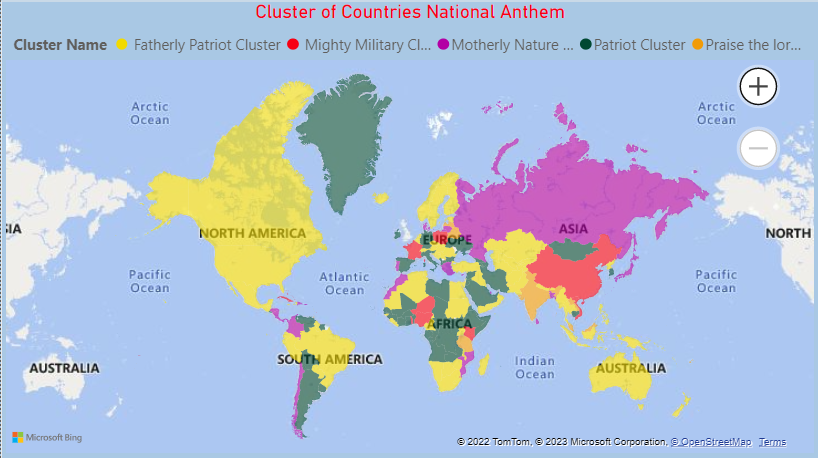

<hr>

**In this notebook**, we will utilize the **k-means algorithm**, which is a popular unsupervised clustering method, to group the national anthems of different countries into distinct clusters. The main goal of k-means is to identify similar data points and uncover underlying patterns. The algorithm works by searching for a fixed number of centroids (k) in a dataset. A centroid represents a cluster, which is a group of data points that are similar to each other based on certain criteria. The "means" in k-means refers to the computation of the average of the data points in a cluster to determine its centroid. The algorithm is unsupervised since we do not have any prior knowledge of the classes or groups in the dataset, and k-means discovers the underlying groups on its own.
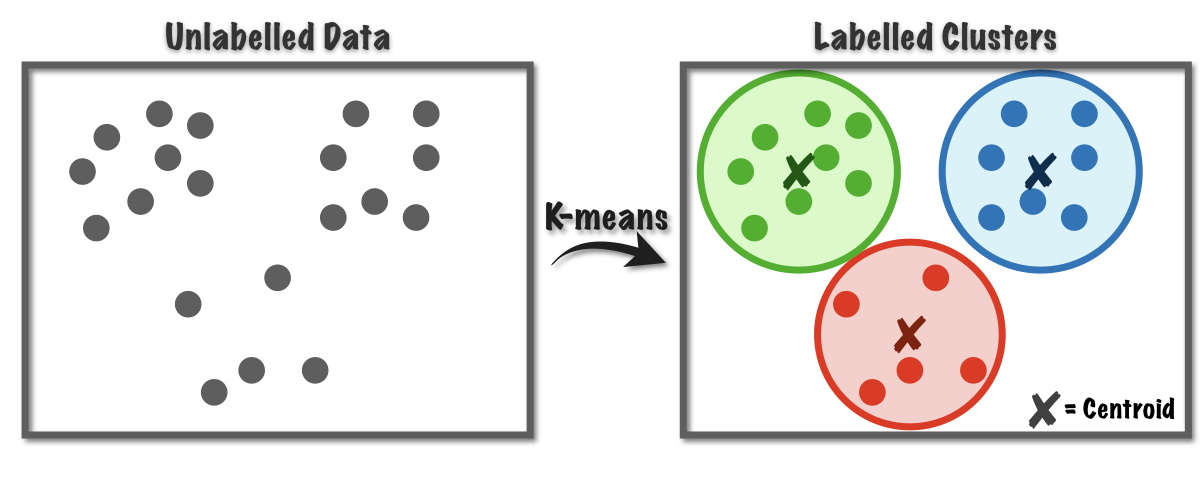

This algorithm was evaluated on a database from Kaggle's [lucasturtle's national-anthems-of-the-world](https://www.kaggle.com/datasets/lucasturtle/national-anthems-of-the-world). Which has national anthem of 190 countires, translated in english.

# Data Gathering

## Setting up kaggle api for getting the datset
<hr>

####For that you can go to kaggle.com-> your profile-> Account-> Create New API Token
Then upload the kaggle.json file in google collab and then run the below commands

In [2]:
! pip install kaggle
! mkdir ~/.kaggle #creating a hidden directory 
! cp kaggle.json ~/.kaggle/ #pasting the kaggle api token to above dir
! chmod 600 ~/.kaggle/kaggle.json ## chaging the mode for the file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Put the name of the dataset that you want to use and then unzip the dataset**

In [3]:
! kaggle datasets download lucasturtle/national-anthems-of-the-world # downloading the datset

  0% 0.00/54.4k [00:00<?, ?B/s]
100% 54.4k/54.4k [00:00<00:00, 28.4MB/s]


In [4]:
! unzip /content/national-anthems-of-the-world.zip  #unzip the downloaded dataset

Archive:  /content/national-anthems-of-the-world.zip
  inflating: anthems.csv             


# Installing and Importing Required Packages

These two packages are not present by default in anaconda or google collab so we have to install them. Their uses will be discussed later in the notebook.

In [5]:
!pip install geopandas
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 55.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 4.9 MB/s eta 0:00:00


In [6]:
# Data Structures
import numpy  as np
import pandas as pd
import geopandas as gpd
import json

# Corpus Processing
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import nltk.corpus
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Data Analysis and Processing

In [7]:
data = pd.read_csv('/content/anthems.csv', encoding='utf-8') #reading the dataset
data.columns = map(str.lower, data.columns)
data.head()

,country,alpha-2,alpha-3,continent,anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    190 non-null    object
 1   alpha-2    189 non-null    object
 2   alpha-3    190 non-null    object
 3   continent  190 non-null    object
 4   anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


In [9]:
data[data['alpha-2'].isna()]

,country,alpha-2,alpha-3,continent,anthem
168,Namibia,NaN,NAM,Africa,Namibia land of the brave Freedom fight we he ...


In [10]:
data['alpha-2'].iloc[168] = "NA"  # link https://www.iban.com/country-codes
print(data[data['alpha-2'].isna()])

Empty DataFrame
Columns: [country, alpha-2, alpha-3, continent, anthem]
Index: []


In [11]:
corpus_in_begining = data['anthem'].tolist()  # making a list of all anthems of 190 countries
len(corpus_in_begining)

190

In [12]:
print(corpus_in_begining[97][0:]) #india's national anthem in english 
print("-------------------")
print(corpus_in_begining[18][0:447]) #Hungary till 447th letter as it is long anthem

Thou art the ruler of the minds of all people, Dispenser of India's destiny. Thy name rouses the hearts of Punjab, Sindh,  Gujarat and Maratha, Of the Dravida and Odisha and Bengal; It echoes in the hills of Vindhya and the Himalayas, Mingles in the music of Ganga and Yamuna and is chanted by The waves of the Indian sea. They pray for thy blessings and sing thy praise. The saving of all people waits in thy hand, Thou dispenser of India's destiny. Victory, victory, victory to thee
-------------------
O Lord, bless the nation of Hungary With your grace and bounty Extend over it your guarding arm During strife with its enemies Long torn by ill fate Bring upon it a time of relief This nation has suffered for all sins Of the past and of the future! You brought our ancestors up Over the Carpathians' holy peaks By You was won a beautiful homeland For Bendeguz's sons And wherever flow the rivers of The Tisza and the Danube ÃƒÂrpÃƒÂ¡d our hero's 


 ## Data / Corpus Processing
 <hr>

We intend to carry out a data engineering process on our anthems dataset to ready it for statistical modeling. Our primary goal is to extract the semantic meaning from the text by removing words that do not belong to the English alphabet and simplifying the remaining words.

Our First step is to tokenize the data which is a fancy way to say to break the sentences into words.

Once we complete the previous step, we will proceed to remove all stop words from the anthem. Stop words are commonly used words, such as "a," "an," "the," and etc. While necessary for grammar, they do not carry any significant meaning on their own. Therefore, we will provide only the keywords to the algorithm.

Similarly, we will remove any pronunciation marks, such as full stops or commas, as they do not contribute to the semantic meaning of the text.

The final and most crucial step is stemming, which involves extracting the root of each word. For instance, "shining" becomes "shine," "flew" becomes "fly," and "laughed" becomes "laugh."

In [13]:
# removes a list of words (ie. stopwords) from a tokenized list.
def remove_words(list_of_tokens, list_of_words):
    return [token for token in list_of_tokens if token not in list_of_words]

# applies stemming to a list of tokenized words
def apply_stemming(list_of_tokens, stemmer):
    return [stemmer.stem(token) for token in list_of_tokens]

# removes any words composed of less than 2 or more than 21 letters
def two_or_22_letters(list_of_tokens):
    two_or_22_letter_word = []
    for token in list_of_tokens:
        if len(token) <= 2 or len(token) >= 21:
            two_or_22_letter_word.append(token)
    return two_or_22_letter_word

**The function below will call the above defined function for each anthem. It will also incorportate some logic to remove unwanted urls or symbols from the corpus as well as make all letters in lowercase**

It also uses three txt files to take all the coutries list, nationalities list and as well as list of all the stop workds

In [14]:
def prepare_corpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    countries_list = [line.rstrip('\n') for line in open('/content/countries.txt')] # Load .txt file line by line
    nationalities_list = [line.rstrip('\n') for line in open('/content/nationalities.txt')] # Load .txt file line by line
    other_words = [line.rstrip('\n') for line in open('/content/stopwords_scrapmaker.txt')] # Load .txt file line by line
    
    for single_doc in corpus:
        index = corpus.index(single_doc)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        list_of_tokens = word_tokenize(corpus[index])
        two_or_22_letter_word = two_or_22_letters(list_of_tokens)

        list_of_tokens = remove_words(list_of_tokens, stopwords)
        list_of_tokens = remove_words(list_of_tokens, two_or_22_letter_word)
        list_of_tokens = remove_words(list_of_tokens, countries_list)
        list_of_tokens = remove_words(list_of_tokens, nationalities_list)
        list_of_tokens = remove_words(list_of_tokens, other_words)
        
        list_of_tokens = apply_stemming(list_of_tokens, param_stemmer)
        list_of_tokens = remove_words(list_of_tokens, other_words)

        corpus[index]   = " ".join(list_of_tokens)
        corpus[index] = unidecode(corpus[index])
    else:
        print("last list_of_tokens in corpus",list_of_tokens)
        print("last corpus[index] in corpus",corpus[index])
        print("last two_or_22_letter_word in corpus",two_or_22_letter_word)

    return corpus

In [15]:
language = 'english'
corpus = prepare_corpus(corpus_in_begining.copy(), language)

last list_of_tokens in corpus ['lift', 'high', 'banner', 'flag', 'symbol', 'freedom', 'proclaim', 'victori', 'prais', 'hero', 'sacrific', 'vow', 'land', 'foe', 'almighti', 'protect', 'bless', 'land', 'love', 'wondrous', 'adorn', 'mountain', 'river', 'cascad', 'flow', 'free', 'rain', 'abound', 'fertil', 'field', 'fed', 'labour', 'bless', 'almighti', 'protect', 'bless', 'land', 'god', 'beseech', 'bless', 'nativ', 'land', 'land', 'father', 'bestow', 'zambezi', 'limpopo', 'leader', 'exemplari', 'almighti', 'protect', 'bless', 'land']
last corpus[index] in corpus lift high banner flag symbol freedom proclaim victori prais hero sacrific vow land foe almighti protect bless land love wondrous adorn mountain river cascad flow free rain abound fertil field fed labour bless almighti protect bless land god beseech bless nativ land land father bestow zambezi limpopo leader exemplari almighti protect bless land
last two_or_22_letter_word in corpus ['oh', 'of', 'of', ';', 'we', "'", 'to', ';', '.', '

### Results before and after corpus processing

In [16]:
print(corpus_in_begining[18][0:460]) 
print("==================")
print(corpus[18][0:460]) #corpus[country][anthem]

O Lord, bless the nation of Hungary With your grace and bounty Extend over it your guarding arm During strife with its enemies Long torn by ill fate Bring upon it a time of relief This nation has suffered for all sins Of the past and of the future! You brought our ancestors up Over the Carpathians' holy peaks By You was won a beautiful homeland For Bendeguz's sons And wherever flow the rivers of The Tisza and the Danube ÃƒÂrpÃƒÂ¡d our hero's descendants W
lord bless nation grace bounti extend guard arm strife enemi long torn ill fate bring time relief nation suffer sin past futur brought ancestor carpathian holi peak beauti homeland bendeguz son flow river tisza danub afarpafa!d hero descend root bloom plain kun ripen wheat grape field tokaj drip sweet nectar flag plant wild turk earthwork mafa!tyafa! grave armi whimper vienna proud fort sin anger gather bosom struck lightn thunder cloud plunder mongol arro


In [17]:
print(corpus_in_begining[97][0:])
print("==================")
print(corpus[97][0:]) #corpus[country][anthem]

Thou art the ruler of the minds of all people, Dispenser of India's destiny. Thy name rouses the hearts of Punjab, Sindh,  Gujarat and Maratha, Of the Dravida and Odisha and Bengal; It echoes in the hills of Vindhya and the Himalayas, Mingles in the music of Ganga and Yamuna and is chanted by The waves of the Indian sea. They pray for thy blessings and sing thy praise. The saving of all people waits in thy hand, Thou dispenser of India's destiny. Victory, victory, victory to thee
art ruler mind peopl dispens destini rous heart punjab sindh gujarat maratha dravida odisha bengal echo hill vindhya himalaya mingl music ganga yamuna chant wave sea pray bless sing prais save peopl wait hand dispens destini victori victori victori


### Further Processing
As you can see, although the grammar of the words in our anthems may not be correct, this is inconsequential to the algorithm. Simplifying the language in this way can greatly reduce complexity.

However, our work is not yet complete. To enable the algorithm to compare data, we must convert the text into a numeric format through feature engineering.

One such technique for this is to determine the importance of each word in an anthem using the TF-IDF approach (which measures the correlation between a word's frequency and its importance). This process results in a massive table with 190 rows representing countries and 2544 columns representing the total number of words across all national anthems.

In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus) ## assign score to each word in each list
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out()) ## get_feature_names will return the name of word

final_df = tf_idf

print("{} rows".format(final_df.shape))

(190, 2544) rows


In [19]:
final_df.T.nlargest(7, 0)

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
sacr,0.314285,0.000000,0.000000,0.000000,0.095563,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
fatherland,0.254830,0.130993,0.077471,0.207215,0.000000,0.083289,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
proclaim,0.246156,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.117607
flag,0.220666,0.113431,0.000000,0.059811,0.067097,0.000000,0.0,0.000000,0.0,0.0,...,0.098082,0.0,0.0,0.0,0.0,0.07072,0.0,0.0,0.067148,0.070286
earth,0.202957,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.218313,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
man,0.194247,0.149776,0.000000,0.000000,0.000000,0.000000,0.0,0.104472,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000
honour,0.186606,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000


# Model Buidling
<hr>

defining the function for K-means Clustering

In [20]:
# kmeans function
def run_KMeans(max_k, data): #max_k number of clusters
    max_k += 1
    kmeans_results = dict()
    distortions = []
    for k in range(2 , max_k): #min 2 clusters
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} ) #dictionary of K means model object

    return kmeans_results

### Function to find the Silhouette_avg Score and as well as plotting them

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [21]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        # print(silhouette_avg)
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)
    return avg_dict

# Cluster Analysis
<hr>

Now we can choose the best number of K and take a deeper look at each cluster. we have some clues that when K = 5 is when the clusters are best defined for coutries of the continents **Europe, South America, and North America**.

I tried to find the optimal value of K for all the continents but the results were not so promising. So we will be continuing with 5 clusters.
Now, we will use a simple histogram to look at the most dominant words in each cluster:

In [22]:
# avg_dict = silhouette(kmeans_results, final_df)
# print(avg_dict)

In [23]:
k = 8 # test for 8 clusters
kmeans_results = run_KMeans(k, final_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366

In [24]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [25]:
best_result = 5
kmeans = kmeans_results.get(best_result)

# Prediction and Visuallization

In [26]:
# Model Prdecition
final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
print(final_df)
prediction

      abandon  abanyarwanda  abid  ablaz    abound  absolut   abstain  abund  \
0    0.000000           0.0   0.0    0.0  0.000000      0.0  0.173231    0.0   
1    0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
2    0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
3    0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
4    0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
..        ...           ...   ...    ...       ...      ...       ...    ...   
185  0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
186  0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
187  0.102768           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
188  0.000000           0.0   0.0    0.0  0.000000      0.0  0.000000    0.0   
189  0.000000           0.0   0.0    0.0  0.153457      0.0  0.000000    0.0   

     abyss   ac  ...  yonder  yore     

array([3, 3, 1, 3, 0, 1, 1, 3, 1, 2, 1, 2, 1, 1, 4, 3, 3, 2, 1, 1, 3, 3,
       0, 1, 2, 1, 2, 1, 3, 1, 1, 4, 2, 3, 1, 2, 1, 1, 3, 3, 1, 1, 3, 0,
       3, 3, 1, 2, 2, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 4, 1, 2, 2, 3, 2,
       2, 2, 2, 1, 0, 4, 1, 4, 1, 0, 3, 1, 3, 3, 1, 1, 1, 0, 1, 1, 4, 3,
       1, 0, 1, 3, 2, 1, 1, 3, 4, 0, 1, 3, 1, 1, 2, 3, 1, 1, 1, 0, 3, 4,
       0, 3, 3, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 3, 2, 3, 1, 1, 1, 1, 3, 1,
       4, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 4, 1, 1, 3, 1, 1, 3, 1, 3, 2, 2, 1, 4, 4, 3, 3, 1, 3, 3,
       3, 1, 3, 1, 3, 1, 0, 0, 4, 1, 1, 2, 3, 1], dtype=int32)

# Plotting the most common words in each cluster

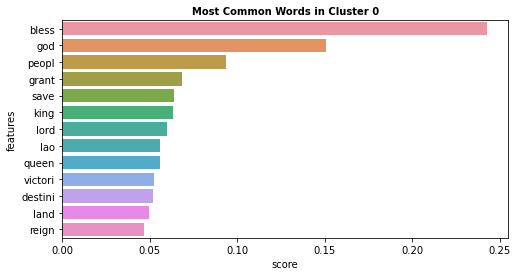

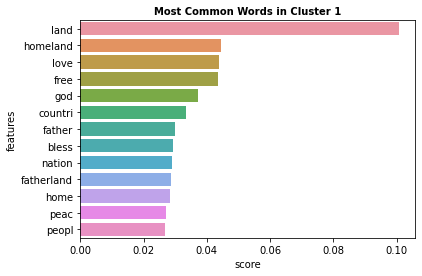

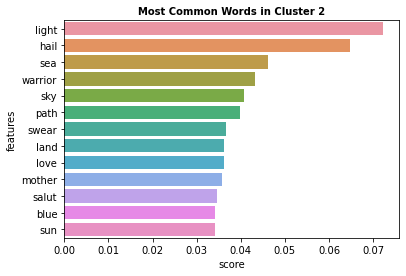

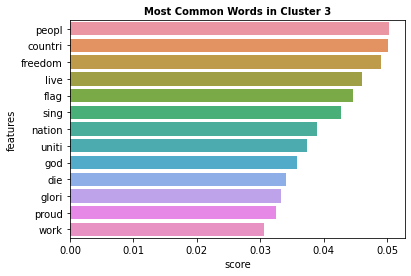

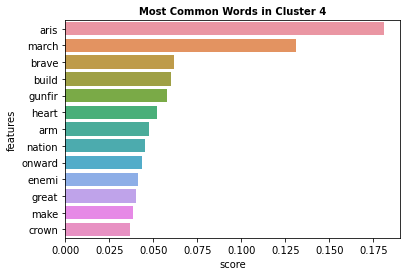

In [27]:
n_features = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_features)
plotWords(dfs, 13)


In [28]:
common_words=[]
for i in dfs:
  common_words.append(list(i['features'].values)) # to store common words along with the label in final csv.

**We can generate a word cloud for each cluster using which we can know which words appear the most in the anthems in that cluster.**

In [29]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

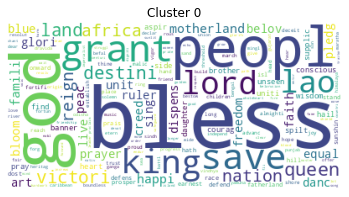

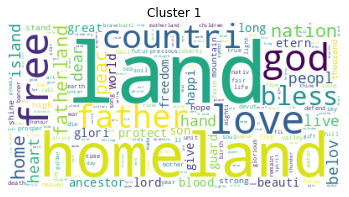

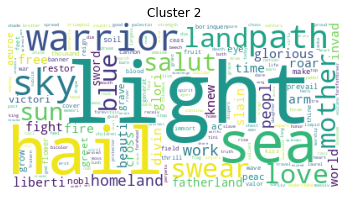

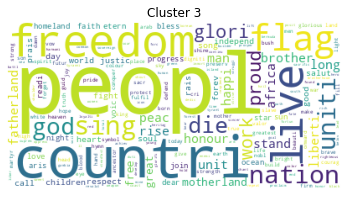

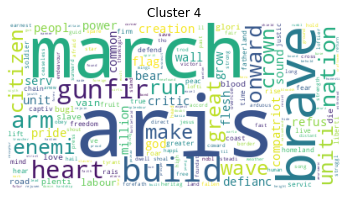

In [30]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

# Cluster Intution
<hr>

Here, if can see that in the 0th cluster: The most common words are bless, God, Glori, etc. based on these words we can give the cluster name its name

**0 => Praise the lord cluster**

In the second cluster, we can see the most common words are Father, Freedom, nation, etc. So the name can be

**1 => Fatherly Patriot Cluster**

Similarly, in the third cluster, the most common words are mother, land, home, etc. So we can give it the name.

**2 => Motherly Nature Cluster**

As the anthems in this cluster mostly praise their nature and land and show love towards it.

Now the fourth Cluster describes mostly patriarchy so we can give the name

**3 => Patriot Cluster**

In the last cluster, the most common words are march, brave, gunfire, etc. So it is easy to say that it is a

**4 => Mighty Military Cluster**


The names are purely imaginary and do not intend to make harm anyone's feelings.
<hr>


So, we have names of our clusters let's rename them and visualize them on the world map to see the results and gain better intuition.

In [31]:
# Assigning the cluster labels to each country
labels = kmeans.labels_ 
data['label'] = labels
data['common_words'] = data['label'].map({0:common_words[0],1:common_words[1],2:common_words[2],3:common_words[3],4:common_words[4]})
data['label_name'] = data['label'].map({0:"Praise the lord cluster",1:" Fatherly Patriot Cluster",2:"Motherly Nature Cluster",3:"Patriot Cluster",4:" Mighty Military Cluster"})
data.to_csv("./grouped_national_anthems.csv",index=False)
data.head()

,country,alpha-2,alpha-3,continent,anthem,label,common_words,label_name
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",3,"[peopl, countri, freedom, live, flag, sing, na...",Patriot Cluster
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",3,"[peopl, countri, freedom, live, flag, sing, na...",Patriot Cluster
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",1,"[land, homeland, love, free, god, countri, fat...",Fatherly Patriot Cluster
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",3,"[peopl, countri, freedom, live, flag, sing, na...",Patriot Cluster
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",0,"[bless, god, peopl, grant, save, king, lord, l...",Praise the lord cluster


In [32]:
import json
import geopandas as gpd

# Loading countries polygons
geo_path = '/content/world-countries.json'
country_geo = json.load(open(geo_path))
gpf = gpd.read_file(geo_path)

# Merging on the alpha-3 country codes
merge = pd.merge(gpf, data, left_on='id', right_on='alpha-3')
data_to_plot = merge[["id", "name", "label","label_name", "geometry"]]

data_to_plot.head(5)

,id,name,label,label_name,geometry
0,AFG,Afghanistan,1,Fatherly Patriot Cluster,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,3,Patriot Cluster,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,3,Patriot Cluster,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,3,Patriot Cluster,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,3,Patriot Cluster,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [33]:
import branca.colormap as cm

# Creating a discrete color map
values = data_to_plot[['label']].to_numpy()
color_step = cm.StepColormap(['r', 'y','g','b', 'm'], vmin=values.min(), vmax=values.max(), caption='step')

color_step

In [34]:
import folium
from branca.element import Figure

def make_geojson_choropleth(display, data, colors):
    '''creates geojson choropleth map using a colormap, with tooltip for country names and groups'''
    group_dict = data.set_index('id')['label'] # Dictionary of Countries IDs and Clusters
    tooltip = folium.features.GeoJsonTooltip(["name", "label_name"], aliases=display, labels=True)
    return folium.GeoJson(data[["id", "name","label_name","geometry"]],
                          style_function = lambda feature: {
                               'fillColor': colors(group_dict[feature['properties']['id']]),
                               #'fillColor': test(feature),
                               'color':'black',
                               'weight':0.5
                               },
                          highlight_function = lambda x: {'weight':2, 'color':'black'},
                          smooth_factor=2.0,
                          tooltip = tooltip)

# Makes map appear inline on notebook
def display(m, width, height):
    """Takes a folium instance and embed HTML."""
    fig = Figure(width=width, height=height)
    fig.add_child(m)
    #return fig

#Result Analysis
<hr>

The use of an ML algorithm has saved significant effort and time that would have been required to manually segregate all the national anthems. Moving forward, let's explore the national anthems that the ML algorithm has classified as similar.

Firstly, let's consider the **Red Cluster (Praise the Lord/0th Cluster)**. India's National Anthem is grouped together with UK's national anthem, "God Save the Queen/King". Both anthems address God, and Tanzania's national anthem also talks about God blesses Africa Bless its Leaders. Hence, these countries are clustered together.

In the 1st cluster **(Fatherly Patriot Cluster)**, a lot of countries in the West are included in the yellow cluster. The common words in this cluster are land, homeland, free, and fatherland, which are stereotypically patriotic words. Nepal's national anthem is grouped with the USA's "The Star-Spangled Banner", which was written during the fight between the USA and Britain. Both anthems contain themes of freedom and courage.

Moving on to the **light purple cluster**, which includes Saudi Arabia, Iran, Spain, South Korea, and some other countries. The common words in this cluster are people, flag, and country, with no unique characteristics identified. Thus, we can classify this cluster as a patriotic cluster based on the common words.

The next cluster is the **pink cluster**, which includes China, France, Kenya, and some other countries. The national anthems in this cluster are full of military words like courage and bravery, giving a warlike vibe. These countries have experienced wars and revolutions in the past, leading to the formation of this cluster named the Mighty Military Cluster.

Finally, in the last cluster which is the **Green Cluster**, both Sri Lanka and Bangladesh are grouped together as we mentioned in the introduction itself. Along with them, Russia is also there because it also talks about Russia's land, and nature and refers to the country as a motherland. There is no doubt why the cluster is named *Motherly Nature Cluster*.


#Map Visualization
<hr>
Here we have a interactive map in which you can see each in the country's category by hovering over it.


In [35]:
# Initializing our Folium Map
m = folium.Map(location=[43.5775, -10.106111], zoom_start=2.3, tiles='cartodbpositron')

# Making a choropleth map with geojson
geojson_choropleth = make_geojson_choropleth(["Country:", "Group:"], data_to_plot, color_step)
geojson_choropleth.add_to(m)

width, height = 1300, 675
display(m, width, height)
m

#Conclusion
<hr>

The KNN algorithm successfully created clusters, but the results are not entirely clear. For instance, while the Swedish national anthem contains elements of nature such as sun, mountains, sky, meadows, etc., it is classified as a "Fatherly Patriotic Anthem" along with others. We used an approximate method that took scores of words, and as the algorithm is distance-based, we can increase or decrease accuracy by tuning the model slightly. Another limitation is that the algorithm compares words only to exact matches, while different words such as "strength" and "power" have the same meaning.

One way to address this limitation is to use **word2vec**, either by training the model for similar words or using trained models, to give similar words the same weightage. This can improve the accuracy of the model.

In conclusion, this project was fun and educational. A **Power BI Dashboard** was also created for further exploration and can be found in the same GitHub repository (https://github.com/amankrpandey1/National_Anthems_Across_the_World_Clustering_using_KNN).

Special thanks to India in Pixels by Ashris for inspiring this idea, and to lucas-de-sa(national-anthems-clustering) for providing the code on GitHub. 
<hr>

**Please note** that the skeleton logic for comparing a country's national anthem is provided, where you can simply input the name of the country to see its national anthem.

In [39]:
data["country"].values

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Moldova (the Republic of)', 'Montenegro',
       'Netherlands (the)', 'Norway', 'Poland', 'Portugal',
       'Republic of North Macedonia', 'Romania',
       'Russian Federation (the)', 'Serbia', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela',
       'United States of America', 'Canada', 'Mexico', 'Guatemala',
       'Cuba', 'Haiti', 'Dominican Republic', 'Honduras', 'El Salvador',
       'Ni

In [50]:
# Search country name from above list
country1 = "India"  
country2 = "United Kingdom of Great Britain and Northern Ireland (the)" #Sri Lanka
anthem1 = data[data["country"]==country1]["anthem"].values
anthem2 = data[data["country"]==country2]["anthem"].values

print(anthem1)
print("=========")
print(anthem2)
print("=========")
print("common words: ")
print("=========")
print(data[data["country"]==country1]["common_words"].values[0])
print("=========")
print(data[data["country"]==country2]["common_words"].values[0])

["Thou art the ruler of the minds of all people, Dispenser of India's destiny. Thy name rouses the hearts of Punjab, Sindh,  Gujarat and Maratha, Of the Dravida and Odisha and Bengal; It echoes in the hills of Vindhya and the Himalayas, Mingles in the music of Ganga and Yamuna and is chanted by The waves of the Indian sea. They pray for thy blessings and sing thy praise. The saving of all people waits in thy hand, Thou dispenser of India's destiny. Victory, victory, victory to thee"]
["God Save the Queen God save our gracious Queen, Long live our noble Queen, God save the Queen; Send her victorious, Happy and glorious, Long to reign over us, God save the Queen. Oh Lord our God arise, Scatter our enemies, And make them fall Confound their politics Frustrate their knavish tricks, On Thee our hopes we fix Oh save us all Thy choicest gifts in store On her be pleased to pour; Long may she reign; May she defend our laws And ever give us cause To sing with heart and voice God save the Queen N